<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 02
*28 de Septiembre de 2024*

**Nombre Estudiante(s)**: `Juan Ugalde - César Godoy - Erick Cisterna`

### 1. Introducción

A través de este laboratorio se analizarán diferentes técnicas de Clustering, aplicadas sobre la segmentación de colores de una imagen seleccionada por el grupo. Para esto, se implementarán los algoritmos de KMeans, Clustering Jerárquico y Mezclas de Gaussianas, las cuales se destacan por ser herramientas esenciales en Machine Learning no supervisado. El propósito principal es reducir la imagen a una paleta de colores limitada donde se identificarán colores dominantes, para que posteriormente sean utilizados para reconstruir la imagen en función de esta nueva escala cromática. Por otro lado, se implementarán métricas como "Scree Plot" para determinar el número óptimo de clusters. Finalmente, se comparará cuál de los algoritmos utilizados es el más eficiente en términos de segmentación y precisión visual.

### 2. Objetivos

- Utilizar los algoritmos de KMeans, Clustering Jerárquico y Gaussian Mixtures.
- Subir una foto en formato .npg, y obtener los siguientes datos:
    - Escala de colores (mínimo 3 colores y máximo el ideal comparativo encontrado por scree-plot). 
    - Recomponer la imagen exclusivamente con esa escala reducida. 
    - Ajustar Kmeans, realizar análisis de Clustering Jerárquico y ajustar siempre utilizando SkLearn Mezclas de Gaussianas.

### 3. Metodología

Para el desarrollo de este proyecto, se ejecutarán una serie de actividades que conforman la metodología de trabajo implementada. Por lo tanto, a continuación se lista cada una de ellas para mejor compresión del proceso.

1. Importación de Librerías
2. Carga de Imagen
3. Clustering con KMeans
4. Determinación y explicación de paleta de colores
5. Restauración de la imagen
6. Clustering Jerárquico
7. Aplicación método de Mezcla de Gaussinas

### 4. Descripción

A continuación, se detallará cada una de las actividades mencionadas en la sección anterior.

#### 4.1 Importación de Librerías

In [52]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from skimage import io
from skimage.color import rgb2lab, lab2rgb
from sklearn.metrics import pairwise_distances_argmin

#### 4.2 Carga de Imagen

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Erick Cisterna\AppData\Local\Temp\ipykernel_6644\2603400061.py:2: SyntaxWarning: invalid escape sequence '\p'
  image = io.imread('D:\proyectos\Python\Machine Learning\Laboratorio_Machine_Learning\Imagenes\photo-1680529643198-e4207c3fc209.png')  # Usa una URL o el nombre del archivo local


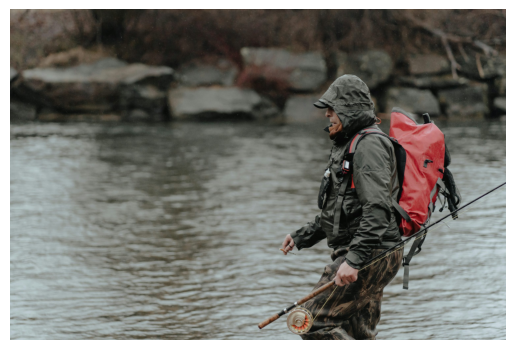

In [63]:
# Cargar la imagen
image = io.imread('D:\proyectos\Python\Machine Learning\Laboratorio_Machine_Learning\Imagenes\photo-1680529643198-e4207c3fc209.png')  # Usa una URL o el nombre del archivo local
plt.imshow(image)
plt.axis('off')
plt.show()

# Asegurarnos de que la imagen esté en el formato correcto
image = np.array(image, dtype=np.float64) / 255  # Normalizar los valores
rows, cols, dim = image.shape

#### 4.3 Clustering con KMeans


Antes de realizar el proceso de Clustering con KMeans, se aplicará el método del codo (`"Scree-plot"`) para determinar el número óptimo de clusters.

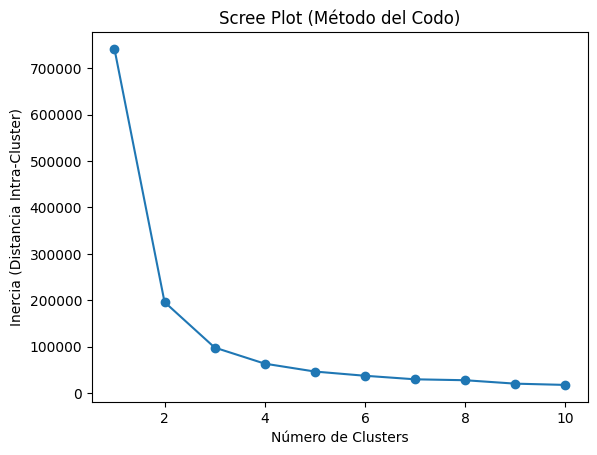

In [64]:
# Lo primero es convertir la imagen 2D a una lista de píxeles
imagen_array = image.reshape((-1, 3))

pixels = imagen_array

# Aplicamos el método del codo (Scree Plot) para determinar el número óptimo de clusters
inertia = []
clusters_range = range(1,11)  # Evaluamos entre 1 y 10 clusters
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)

# Graficar el Scree Plot
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (Distancia Intra-Cluster)')
plt.title('Scree Plot (Método del Codo)')
plt.show()

Ya identificado el número óptimo de Clusters, se aplica el método de KMeans para agrupar los colores.

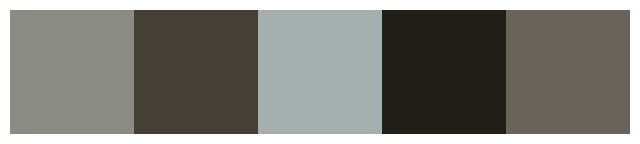

In [65]:
# Número de clusters para la reducción de colores
num_clusters = 5  # Ajustar segun necesidad

# Aplicar KMeans
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)
labels = kmeans.predict(pixels)

# Obtener la paleta de colores
palette = kmeans.cluster_centers_

# Mostrar la paleta de colores
def plot_palette(palette):
    plt.figure(figsize=(8, 2))
    plt.imshow([palette])
    plt.axis('off')
    plt.show()

plot_palette(palette)


#### 4.4 Determinación y explicación de paleta de colores

Como se puede apreciar en el gráfico anterior (Palette), mediante la aplicación de KMeans se ha obtenido el conjunto de colores dominantes de la imagen cargada, es decir, los pixeles de la imagen que tienen colores similares se han agrupado en Clusters diferentes. Mediante esta técnica, se logra una compresión visual donde la imagen se puede representar con menos colores sin perder significativamente su escencia. 

#### 4.5 Restauración de la Imagen

Ya obtenido esta nueva paleta de colores (centroides), se reconstruirá la imagen original donde se reemplzará cada píxel por el color dominante.

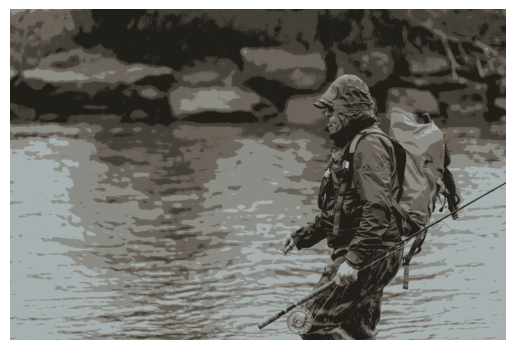

In [66]:
# Asignar cada píxel al color más cercano de la paleta
new_image_array = palette[labels]

# Reconstruir la imagen
new_image = new_image_array.reshape((rows, cols, dim))

# Mostrar la imagen reconstruida
plt.imshow(new_image)
plt.axis('off')
plt.show()


#### 4.6 Aplicación Clustering Jerárquico
El clustering jerárquico se puede usar para encontrar patrones en los datos de píxeles. Aquí aplicamos el algoritmo de aglomeración jerárquica.

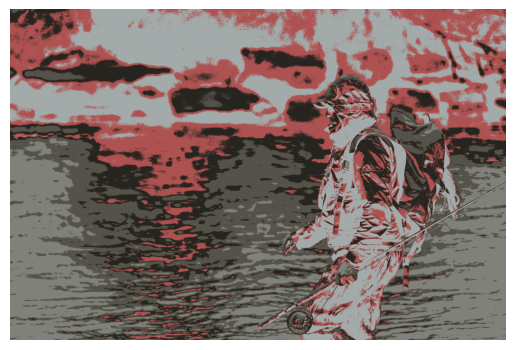

In [16]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=1000)
kmeans_labels = kmeans.fit_predict(image_array)

new_image_kmeans = palette[kmeans_labels].reshape((rows, cols, dim))

plt.imshow(new_image_kmeans)
plt.axis('off')
plt.show()



#### 4.7 Aplicación Mezcla de Gaussianas
Finalmente, aplicamos Gaussian Mixture Models para crear mezclas de gaussianas sobre los colores.

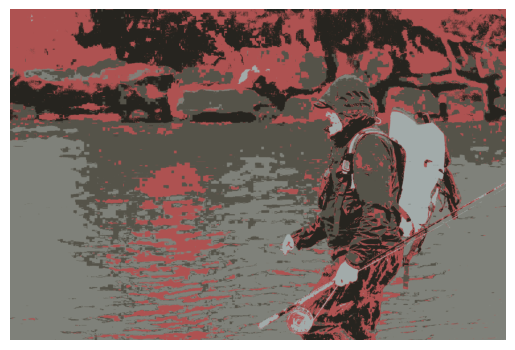

In [17]:
# Modelo de mezclas gaussianas
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(image_array)
gmm_labels = gmm.predict(image_array)

# Reconstruir la imagen usando GMM
new_image_gmm = palette[gmm_labels].reshape((rows, cols, dim))

# Mostrar la imagen reconstruida
plt.imshow(new_image_gmm)
plt.axis('off')
plt.show()


### 5. Conclusiones

Hemos reducido la escala de colores de la imagen utilizando KMeans, clustering jerárquico, y mezclas gaussianas.
Se Observa cómo cada método produce una representación ligeramente distinta de la imagen original.

Comentarios adicionales

* Ajustar el número de clusters según el scree plot o a las necesidades requeridas.

* Este código utiliza librerías estándar como sklearn y skimage para realizar las tareas.